In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

protein_dataset = pd.read_csv('/content/PMC7727026_full_data.csv')
protein_dataset.head()

,Unnamed: 0,Author and Year,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Frequency of exercise before intervention Other,...,Experimental energy intake (kcal/kg/day),Control energy intake (kcal/kg/day),Study Weight Percentage,Group,Energy intake (kcal/kg/day),Protein intake (g/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,0,Campbell (1995) [1],83,Caucasian,65.0,173.3,78.0,26.0,Healthy,Unclear,...,37.0,33.80,0.3,Experimental,37.0,2.40,1.8,0.150000,0.023077,0.001923
1,1,Rozenek (2002) [2],100,Caucasian,23.2,178.3,76.4,24.1,Healthy,High,...,63.3,58.10,0.5,Experimental,63.3,3.30,2.9,0.362500,0.037958,0.004745
2,2,Flakoll (2004) [3],100,Caucasian,18.9,177.0,74.9,23.4,Healthy,High,...,NaN,NaN,0.9,Experimental,NaN,NaN,-2.7,-0.337500,-0.036048,-0.004506
3,3,Rankin (2004) [4],100,Caucasian,20.8,177.5,78.9,25.1,Healthy,Unclear,...,33.3,32.94,0.6,Experimental,33.3,1.25,1.6,0.160000,0.020279,0.002028
4,4,Layman (2005) (with RT) [5],0,Caucasian,46.7,163.2,87.7,33.0,Healthy,Unclear,...,NaN,NaN,1.0,Experimental,NaN,NaN,-0.4,-0.023529,-0.004561,-0.000268


In [4]:
def CheckMissingValues(dataset):
	missing_values = dataset.isnull().sum()
	columns_with_missing = missing_values[missing_values!=0]
	print(columns_with_missing, '\n Total missing values: ', missing_values.sum(),'\n Total values: ', dataset.count().sum())

In [5]:
CheckMissingValues(protein_dataset)

Height (cm)                                                                     2
Weight (kg)                                                                     2
Protein intake before intervention (g/kg/day)                                  32
Protein intake before intervention (g/day)                                     32
Protein intake during intervention (not include supplementation) (g/kg/day)    68
Protein intake during intervention (not include supplementation) (g/day)       68
Protein intake during intervention (include supplementation) (g/kg/day)        45
Protein intake during intervention (include supplementation) (g/day)           43
Energy intake before intervention (g/kg/day)                                   32
Energy intake before intervention (g/day)                                      32
Energy intake during intervention (not include supplementation) (g/kg/day)     72
Energy intake during intervention (not include supplementation) (g/day)        72
Energy intake du

In [6]:
protein_dataset = protein_dataset.fillna(protein_dataset.mode().iloc[0])
CheckMissingValues(protein_dataset)

Series([], dtype: int64) 
 Total missing values:  0 
 Total values:  7616


In [7]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = protein_dataset.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
  protein_dataset[column] = label_encoder.fit_transform(protein_dataset[column].astype(str))

protein_dataset.head()

,Unnamed: 0,Author and Year,Percent male (%),Race with largest number,Age (years),Height (cm),Weight (kg),BMI (kg/m2),Health state,Frequency of exercise before intervention Other,...,Experimental energy intake (kcal/kg/day),Control energy intake (kcal/kg/day),Study Weight Percentage,Group,Energy intake (kcal/kg/day),Protein intake (g/kg/day),LBM change (kg),LBM change per week (kg/wk),Relative LBM change,Relative LBM change per week
0,0,0,83,0,65.0,173.3,78.0,26.0,1,4,...,37.0,33.80,0.3,1,37.0,2.40,1.8,0.150000,0.023077,0.001923
1,1,48,100,0,23.2,178.3,76.4,24.1,1,1,...,63.3,58.10,0.5,1,63.3,3.30,2.9,0.362500,0.037958,0.004745
2,2,15,100,0,18.9,177.0,74.9,23.4,1,1,...,38.4,21.40,0.9,1,21.4,1.38,-2.7,-0.337500,-0.036048,-0.004506
3,3,44,100,0,20.8,177.5,78.9,25.1,1,4,...,33.3,32.94,0.6,1,33.3,1.25,1.6,0.160000,0.020279,0.002028
4,4,30,0,0,46.7,163.2,87.7,33.0,1,4,...,38.4,21.40,1.0,1,21.4,1.38,-0.4,-0.023529,-0.004561,-0.000268


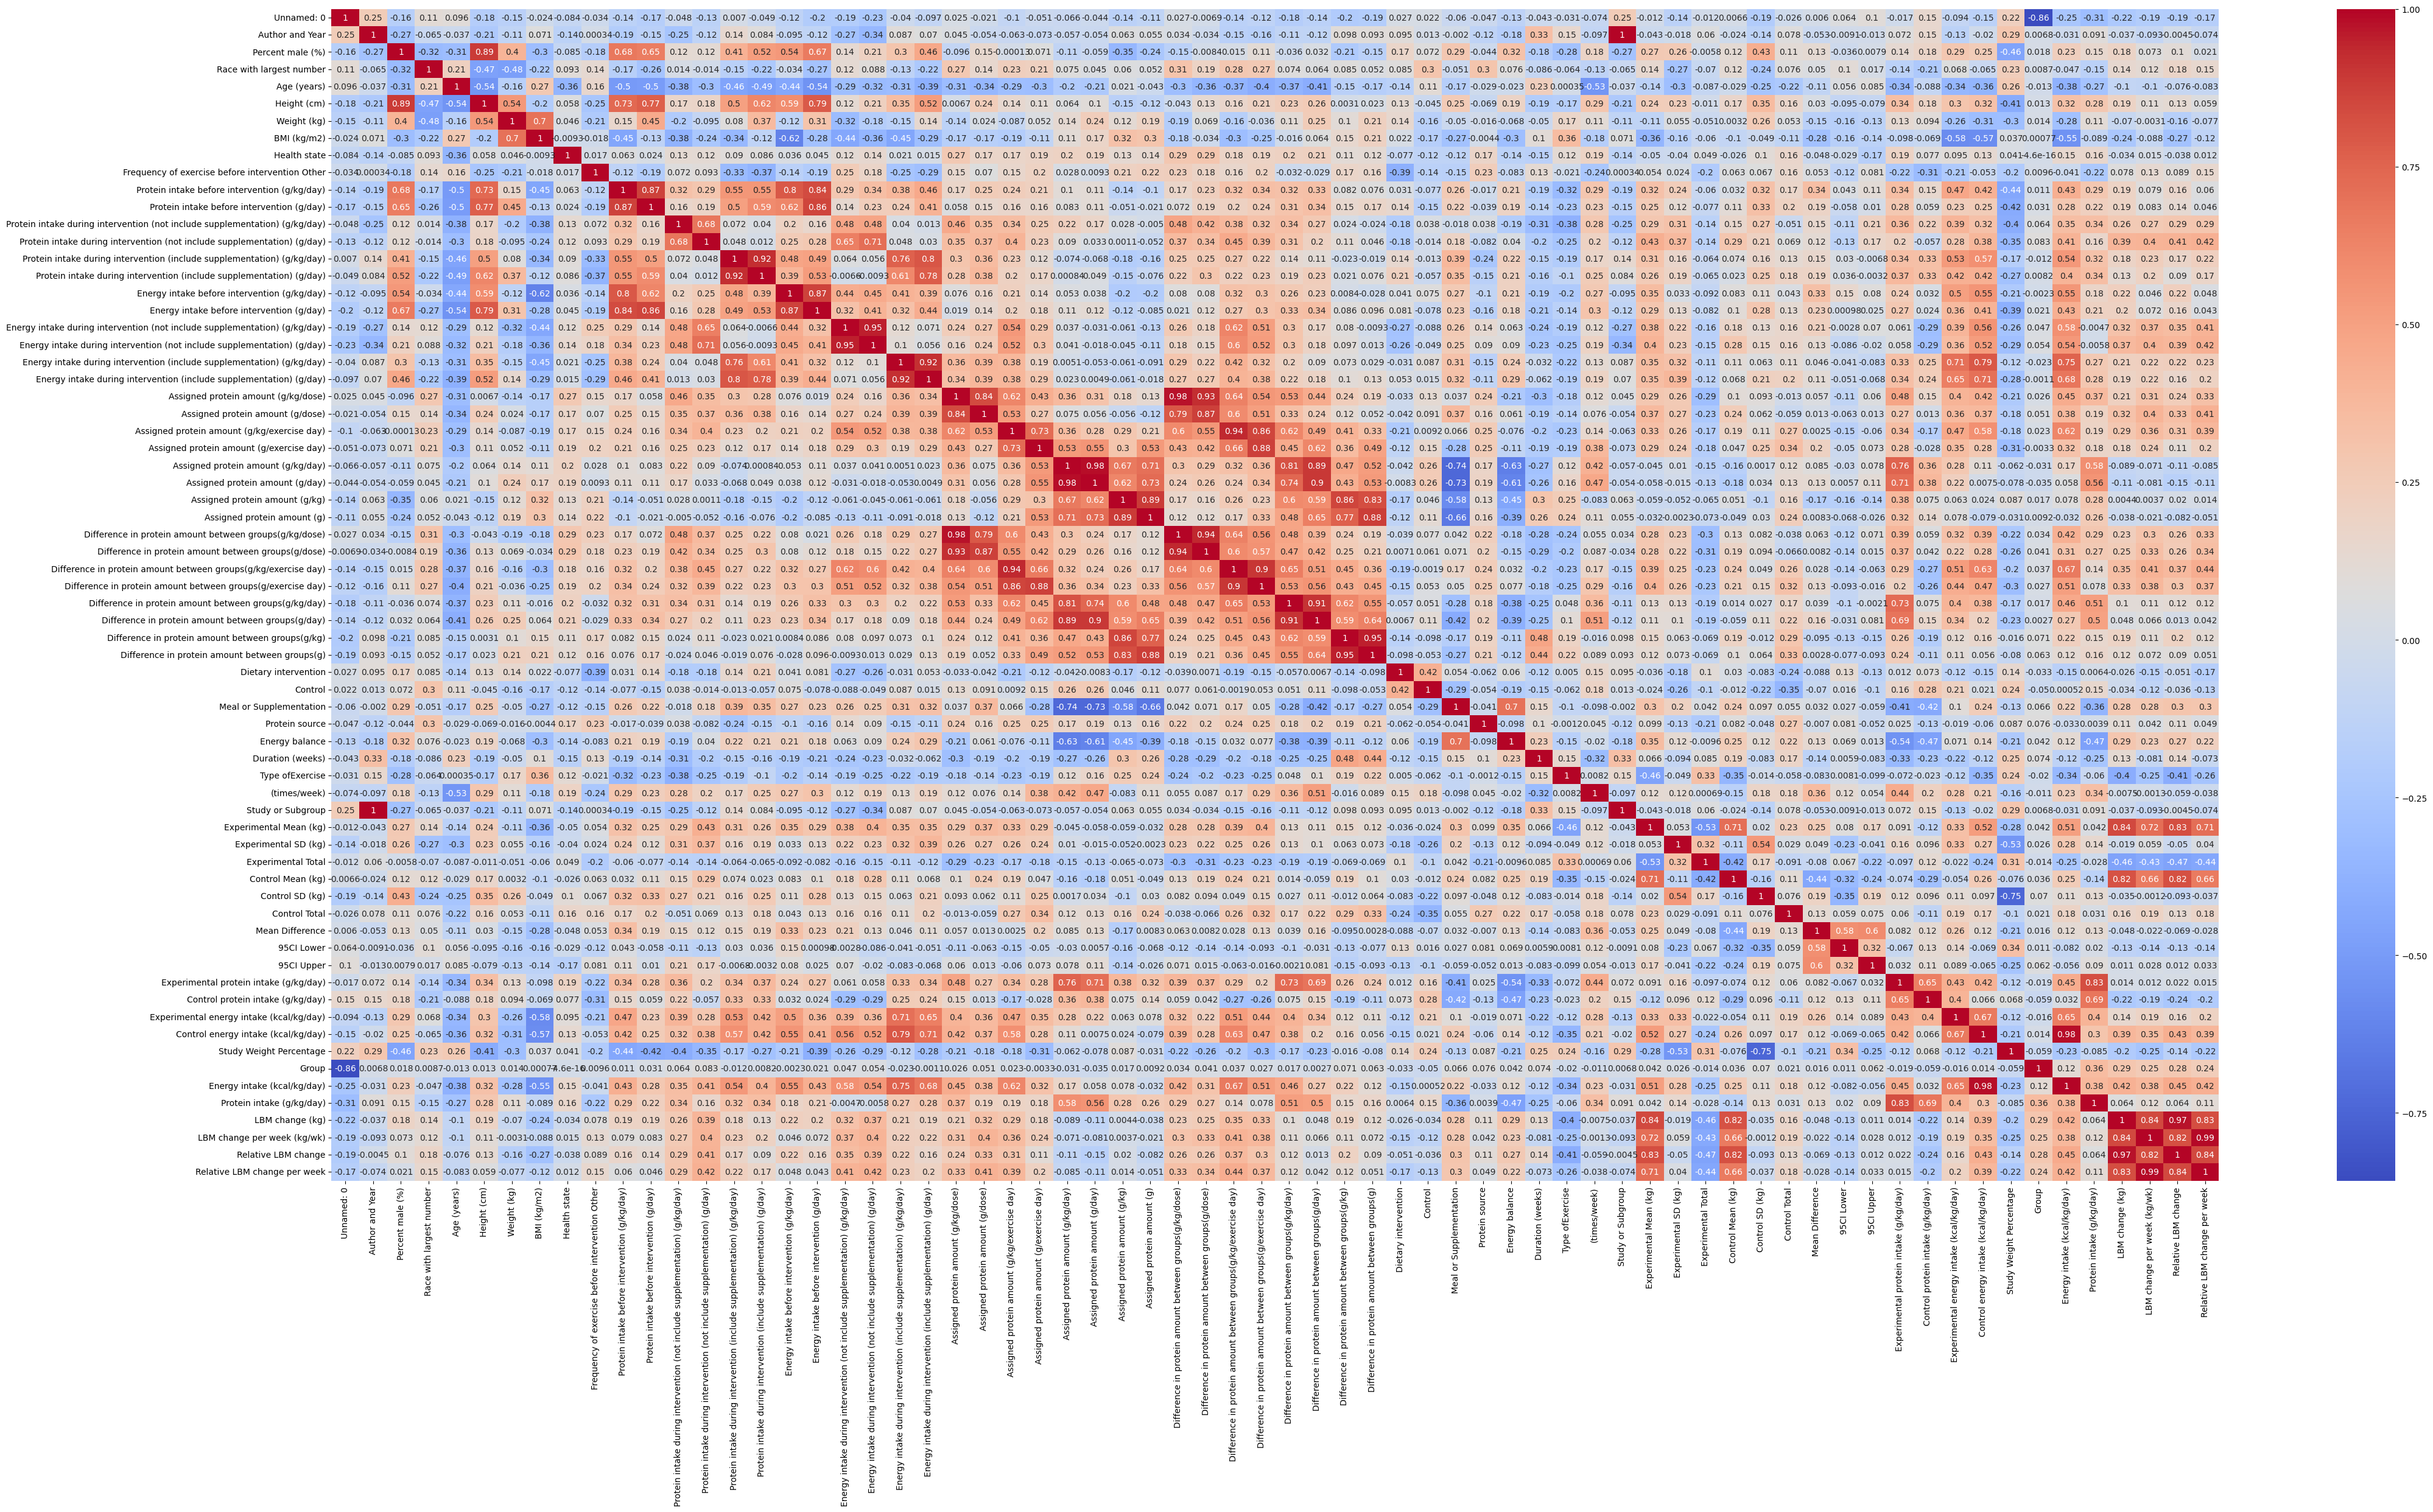

In [8]:
import seaborn as sns

correlation_matrix = protein_dataset.corr()
lbm_corr = correlation_matrix['LBM change (kg)'].sort_values(ascending=False)

plt.figure(figsize=(50, 25))
sns.heatmap(protein_dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
lbm_corr[5:20]

,LBM change (kg)
Control Mean (kg),0.817055
Energy intake (kcal/kg/day),0.415636
Protein intake during intervention (not include supplementation) (g/day),0.394334
Control energy intake (kcal/kg/day),0.390442
Energy intake during intervention (not include supplementation) (g/day),0.372269
Difference in protein amount between groups(g/kg/exercise day),0.345923
Difference in protein amount between groups(g/exercise day),0.327800
Assigned protein amount (g/dose),0.316258
Energy intake during intervention (not include supplementation) (g/kg/day),0.315740
Group,0.291867


In [32]:
lbm_corr[5:10]

,LBM change (kg)
Control Mean (kg),0.817055
Energy intake (kcal/kg/day),0.415636
Protein intake during intervention (not include supplementation) (g/day),0.394334
Control energy intake (kcal/kg/day),0.390442
Energy intake during intervention (not include supplementation) (g/day),0.372269


In [33]:
X = protein_dataset.loc[:,['Control Mean (kg)', 'Energy intake (kcal/kg/day)',
       'Protein intake during intervention (not include supplementation) (g/day)',
       'Control energy intake (kcal/kg/day)',
       'Energy intake during intervention (not include supplementation) (g/day)',
       'Difference in protein amount between groups(g/kg/exercise day)',
       'Difference in protein amount between groups(g/exercise day)',
       'Assigned protein amount (g/dose)',
       'Energy intake during intervention (not include supplementation) (g/kg/day)',
       'Group', 'Energy balance',
       'Assigned protein amount (g/kg/exercise day)',
       'Meal or Supplementation',
       'Protein intake during intervention (not include supplementation) (g/kg/day)',
       'Difference in protein amount between groups(g/dose)']]

X_short = protein_dataset.loc[:,['Control Mean (kg)', 'Energy intake (kcal/kg/day)',
       'Protein intake during intervention (not include supplementation) (g/day)','Difference in protein amount between groups(g/kg/exercise day)',
                                'Group', 'Energy balance',  'Meal or Supplementation']]


y = protein_dataset[['LBM change (kg)']]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X=X_scaled
print(X)

[[ 0.1706592   1.02694137 -0.3952373  ... -2.24831907  0.03855403
  -0.22070279]
 [ 0.1706592   4.51047183  1.10784261 ...  0.459334    0.37071185
   1.77698131]
 [-3.30986428 -1.03933525 -0.3952373  ...  0.459334    0.03855403
  -1.90296308]
 ...
 [ 0.1706592   0.46533798  2.80754635 ...  0.459334    3.36013218
   2.30268765]
 [ 1.27769593  1.84815387 -0.3952373  ...  0.459334    0.03855403
   0.83070989]
 [-0.18359255 -1.03933525 -0.3952373  ...  0.459334    0.03855403
   0.2839753 ]]


In [12]:
y

,LBM change (kg)
0,1.80
1,2.90
2,-2.70
3,1.60
4,-0.40
...,...
107,0.70
108,0.24
109,1.00
110,2.25


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.31927926922273736
R-squared: 0.3886310828991044


In [18]:
single_entry = np.array([70.5, 30.2, 85.0, 28.5, 2100, 0.4, 28.0, 25.0, 29.8, 1, 0, 0.35, 1, 1.2, 5.0]).reshape(1, -1)

model.predict(scaler.fit_transform(single_entry))

array([0.98070361])

In [20]:
from sklearn.linear_model import LinearRegression

modelLinear = LinearRegression()
modelLinear.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred_Linear = modelLinear.predict(X_test)

mse = mean_squared_error(y_test,y_pred_Linear)
r2 = r2_score(y_test,y_pred_Linear)

print("Mean Squared Error for Linear Regression:", mse)
print("R-squared for Linear Regression:", r2)

Mean Squared Error for Linear Regression: 0.28806659178663724
R-squared for Linear Regression: 0.44839838583231084


In [28]:
prediction_dataset = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), pd.Series(y_pred_Linear.flatten(), index=y_test.index)], axis=1)
prediction_dataset.columns = ['Actual', 'Predicted SVC', 'Predicted LinReg']
prediction_dataset.sort_index(ascending=True, inplace=True)
prediction_dataset

,Actual,Predicted SVC,Predicted LinReg
0,1.80,1.461936,1.679198
3,1.60,1.422284,1.493086
9,1.90,1.082094,0.987271
17,1.60,1.856312,2.499090
26,1.90,1.671649,1.566613
28,1.60,1.119110,1.109653
37,1.40,1.464642,1.444065
39,3.30,2.253952,2.441919
40,0.80,-0.351818,-0.240514
42,1.60,0.511669,0.686928


In [34]:
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(X_short, y, test_size=0.2)

In [35]:
model.fit(X_train_short, y_train_short)
modelLinear.fit(X_train_short,y_train_short)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression()

In [41]:
y_pred_SVC_short = model.predict(X_test_short)
y_pred_Linear_short = modelLinear.predict(X_test_short)

In [42]:
mse_SVC_short = mean_squared_error(y_test,y_pred_SVC_short)
r2_SVC_short = r2_score(y_test,y_pred_SVC_short)

mse_Linear_short = mean_squared_error(y_test,y_pred_Linear_short)
r2_Linear_short = r2_score(y_test,y_pred_Linear_short)

print("Mean Squared Error for SVC:", mse_SVC_short)
print("R-squared for SVC:", r2_SVC_short)
print("Mean Squared Error for Linear Regression:", mse_Linear_short)
print("R-squared for Linear Regression:", r2_Linear_short)


Mean Squared Error for SVC: 0.6649388502294479
R-squared for SVC: -0.2732519270441305
Mean Squared Error for Linear Regression: 1.8971778901397445
R-squared for Linear Regression: -2.632793306831765
